<a href="https://colab.research.google.com/github/blazaropinto/portfolio_PDA_Data_Science/blob/main/Happiness_Data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How happy is the world?

![HappinessImage-Benjamin Scott](https://drive.google.com/uc?id=1wWdXTclLAjPpZUiKkR8XGg0Sl7iD1u8T)  

(Image by Benjamin Scott, [source](https://www.natureindex.com/news-blog/data-visualization-these-are-the-happiest-countries-world-happiness-report-twenty-nineteen))   

The Sustainable Development Solutions Network (SDSN) collects data across the world relating to happiness.  They use this data to rank countries in order of happiness factor.

This is not an exact science but can give food for thought in terms of what factors might have the most impact on a nation's happiness levels.

Data is taken from the Gallup World Poll, so not collected directly by SDSN.  
Countries are grouped by region.  

### The factors included are:
Economy (measured in GDP per Capita)	
Family (support systems) 	
Health (measured by Life Expectancy)	
Freedom (sense of)  	 
Trust (Government Corruption)	
Generosity (charitable inclinations)  	
Dystopia Residual 
*  Dystopic is the theoretical most unhappy country with the lowest levels in all six of the above factors  
*  The Residual measure is a calculated as the average of the six distances from lowest

Let's take a look at the data


---
### Open a data set



In [49]:
import pandas as pd
import numpy as np

url_2015 = 'https://github.com/futureCodersSE/working-with-data/blob/main/Happiness-Data/2015.xlsx?raw=true'
happiness_2015 = pd.read_excel(url_2015)
happiness_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [2]:
display(happiness_2015.info(), happiness_2015.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

None

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309882,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


---
### Sort the data in different ways

The data is currently sorted in order of rank.  To sort the data in the table, run the code below, which identifies the column on which to sort in the brackets.

Then, **try sorting on other columns** *Note: you must type the column heading in the quotes and exactly as it appears in the table (including capitalisation)*.



In [3]:
happiness_2015.sort_values(by=['Economy (GDP per Capita)'], ascending=False).head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
27,Qatar,Middle East and Northern Africa,28,6.611,0.06257,1.69042,1.07860,0.79733,0.64040,0.52208,0.32573,1.55674
16,Luxembourg,Western Europe,17,6.946,0.03499,1.56391,1.21963,0.91894,0.61583,0.37798,0.28034,1.96961
38,Kuwait,Middle East and Northern Africa,39,6.295,0.04456,1.55422,1.16594,0.72492,0.55499,0.25609,0.16228,1.87634
23,Singapore,Southeastern Asia,24,6.798,0.03780,1.52186,1.02000,1.02525,0.54252,0.49210,0.31105,1.88501
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531


In [4]:
happiness_2015.sort_values(by=['Health (Life Expectancy)', 'Economy (GDP per Capita)'], ascending=False).head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
23,Singapore,Southeastern Asia,24,6.798,0.03780,1.52186,1.02000,1.02525,0.54252,0.49210,0.31105,1.88501
71,Hong Kong,Eastern Asia,72,5.474,0.05051,1.38604,1.05818,1.01328,0.59608,0.37124,0.39478,0.65429
45,Japan,Eastern Asia,46,5.987,0.03581,1.27074,1.25712,0.99111,0.49615,0.18060,0.10705,1.68435
46,South Korea,Eastern Asia,47,5.984,0.04098,1.24461,0.95774,0.96538,0.33208,0.07857,0.18557,2.21978
35,Spain,Western Europe,36,6.329,0.03468,1.23011,1.31379,0.95562,0.45951,0.06398,0.18227,2.12367


In [5]:
happiness_2015.sort_values(['Freedom', 'Trust (Government Corruption)', 'Economy (GDP per Capita)'], ascending=[False, False, True]).head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
144,Cambodia,Southeastern Asia,145,3.819,0.05069,0.46038,0.62736,0.61114,0.66246,0.07247,0.40359,0.98195
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
43,Uzbekistan,Central and Eastern Europe,44,6.003,0.04361,0.63244,1.34043,0.59772,0.65821,0.30826,0.22837,2.23741


In [6]:
def order_by_length_country_name(col):
  return col.str.len()

happiness_2015.sort_values('Country', key=order_by_length_country_name)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726
57,Peru,Latin America and Caribbean,58,5.824,0.04615,0.90019,0.97459,0.73017,0.41496,0.05989,0.14982,2.59450
98,Laos,Southeastern Asia,99,4.876,0.06698,0.59066,0.73803,0.54909,0.59591,0.24249,0.42192,1.73799
109,Iran,Middle East and Northern Africa,110,4.686,0.04449,1.00880,0.54447,0.69805,0.30033,0.05863,0.38086,1.69440
111,Iraq,Middle East and Northern Africa,112,4.677,0.05232,0.98549,0.81889,0.60237,0.00000,0.13788,0.17922,1.95335
...,...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Brazzaville),Sub-Saharan Africa,139,3.989,0.06682,0.67866,0.66290,0.31051,0.41466,0.11686,0.12388,1.68135
19,United Arab Emirates,Middle East and Northern Africa,20,6.901,0.03729,1.42727,1.12575,0.80925,0.64157,0.38583,0.26428,2.24743
95,Bosnia and Herzegovina,Central and Eastern Europe,96,4.949,0.06913,0.83223,0.91916,0.79081,0.09245,0.00227,0.24808,2.06367
107,Palestinian Territories,Middle East and Northern Africa,108,4.715,0.04394,0.59867,0.92558,0.66015,0.24499,0.12905,0.11251,2.04384


In [7]:
happiness_2015.sort_index(axis=1).head()

,Country,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Region,Standard Error,Trust (Government Corruption)
0,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,1,7.587,0.94143,Western Europe,0.03411,0.41978
1,Iceland,2.70201,1.30232,1.40223,0.62877,0.43630,2,7.561,0.94784,Western Europe,0.04884,0.14145
2,Denmark,2.49204,1.32548,1.36058,0.64938,0.34139,3,7.527,0.87464,Western Europe,0.03328,0.48357
3,Norway,2.46531,1.45900,1.33095,0.66973,0.34699,4,7.522,0.88521,Western Europe,0.03880,0.36503
4,Canada,2.45176,1.32629,1.32261,0.63297,0.45811,5,7.427,0.90563,North America,0.03553,0.32957


---
### Visualising the data

There are many things we can do with this data and you will be asked to think about this.

For now, here is an example of how this data could be visualised in a scatter plot.  

You can plot a line graph by replacing *scatter* with *plot* AND if you want to plot more than one line on the same chart, then you can just add one line for each column to include (one column must be the same in all plots).

Try some different graphs, using different columns.

#### Visualize the correlation between the happiness score and the factors:
* Dystopia Residual	
* Economy (GDP per Capita)	
* Family	
* Freedom	
* Generosity	
* Health (Life Expectancy)	
* Trust (Government Corruption)

1. Calculate the linear regression model between each factor and the happiness score, check if every model is statistically significant and prepare a list of tuples ordered by desceding model adjustment to the experimental data.

2. Show first the visualizacion corresponding to the factor whose linear model better adjusts to the actual data and then, the rest of the plots in descending order, formatting the appropriately.

In [8]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [9]:
x = happiness_2015['Happiness Score']
list_factors = ['Dystopia Residual', 'Economy (GDP per Capita)', 'Family',	'Freedom',	'Generosity',	'Health (Life Expectancy)',	'Trust (Government Corruption)']

list_factors_parameters = []
statistically_significant = []

for y_factor in list_factors:
  y = happiness_2015[y_factor]
  regression = linregress(x,y)
  list_factors_parameters.append((y_factor, y, regression, regression.rvalue))
  if regression.pvalue > 0.05:
    statistically_significant.append('The linear model between '+ y_value + 'and the the happiness score is NOT statistically significant')
  else:
    statistically_significant.append(0)

if any(statistically_significant):
  print(statistically_significant)
else:
  print('All the 7 models are statistically significant')


All the 7 models are statistically significant


In [10]:
y_factor, y, regression, rvalue = zip(*list_factors_parameters)
ordered_rvalues = sorted(rvalue, reverse=True)

ordered_list_factors_parameters = []

for p in ordered_rvalues:
  ordered_list_factors_parameters.append((y_factor[rvalue.index(p)],
                                         y[rvalue.index(p)],
                                         regression[rvalue.index(p)]))
  
display(ordered_list_factors_parameters[:3]) 

[('Economy (GDP per Capita)', 0      1.39651
  1      1.30232
  2      1.32548
  3      1.45900
  4      1.32629
          ...   
  153    0.22208
  154    0.28665
  155    0.66320
  156    0.01530
  157    0.20868
  Name: Economy (GDP per Capita), Length: 158, dtype: float64, LinregressResult(slope=0.27495252800943903, intercept=-0.6319344867421844, rvalue=0.7809655268660213, pvalue=1.0505384131959142e-33, stderr=0.01760546689091576)),
 ('Family', 0      1.34951
  1      1.40223
  2      1.36058
  3      1.33095
  4      1.32261
          ...   
  153    0.77370
  154    0.35386
  155    0.47489
  156    0.41587
  157    0.13995
  Name: Family, Length: 158, dtype: float64, LinregressResult(slope=0.1761713320315191, intercept=0.04399569871972653, rvalue=0.7406051972367848, pvalue=9.91885000010046e-29, stderr=0.012797258911345887)),
 ('Health (Life Expectancy)', 0      0.94143
  1      0.94784
  2      0.87464
  3      0.88521
  4      0.90563
          ...   
  153    0.42864
  154    

In [11]:
def create_graph(y_factor, y, regression):
  '''
  y must be a pandas series
  y_factor must be a str
  regression must be a scipy.stats linear model
  '''
  #create canvas and graphs (experimental data and linear model)
  plt.figure(figsize=(17,6))
  plt.scatter(x,y, c='green', marker='*')
  plt.plot(x, regression.slope*x + regression.intercept, 'r:')
  #other settings
  plt.title(y_factor+' vs Happiness Score', fontsize=16, color='purple')
  plt.xlabel('Happiness Score', fontsize=14) 
  plt.ylabel(y_factor, fontsize=14)
  plt.text(2.8, 0.95*y.max(), 'p value: '+ str(regression.pvalue), fontsize=12, color='grey')
  plt.text(2.8, 0.9*y.max(), 'R^2: '+ str(regression.rvalue**2), fontsize=12, color='grey')
  plt.text(2.8, 0.8*y.max(), 'y = '+ str(round(regression.slope,2)) + 'x +' + str(round(regression.intercept,2)),
           fontsize=12, color='white', bbox={'facecolor':'blue', 'alpha':0.5})
  plt.show()

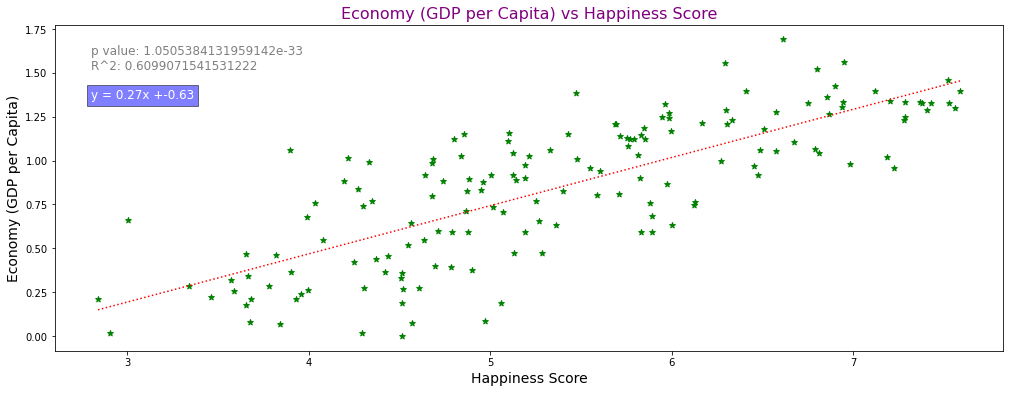

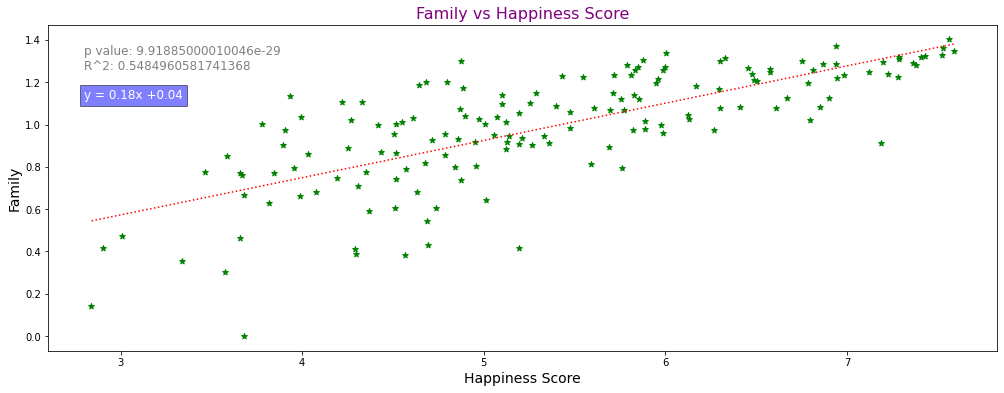

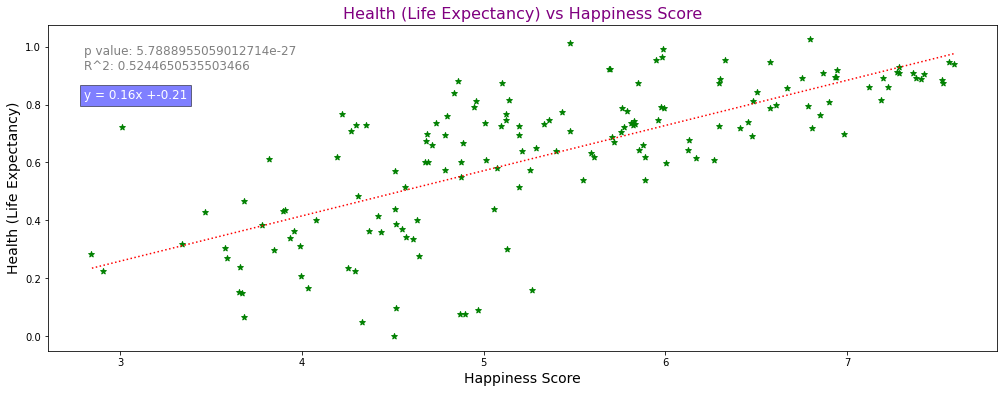

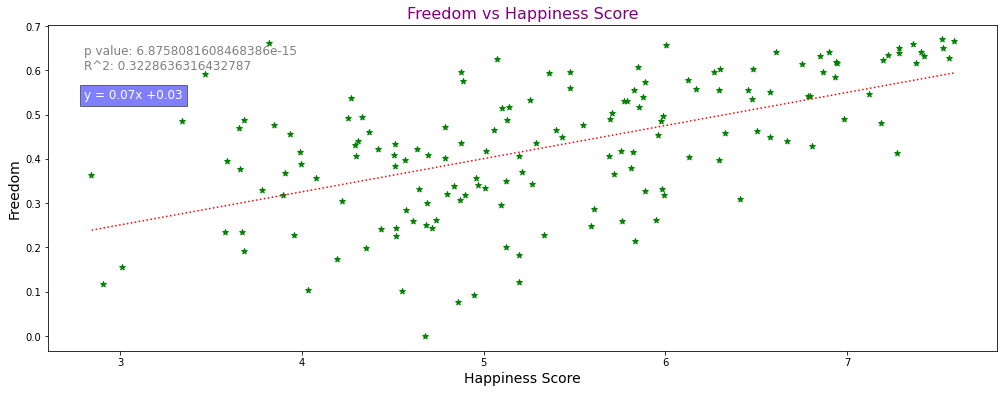

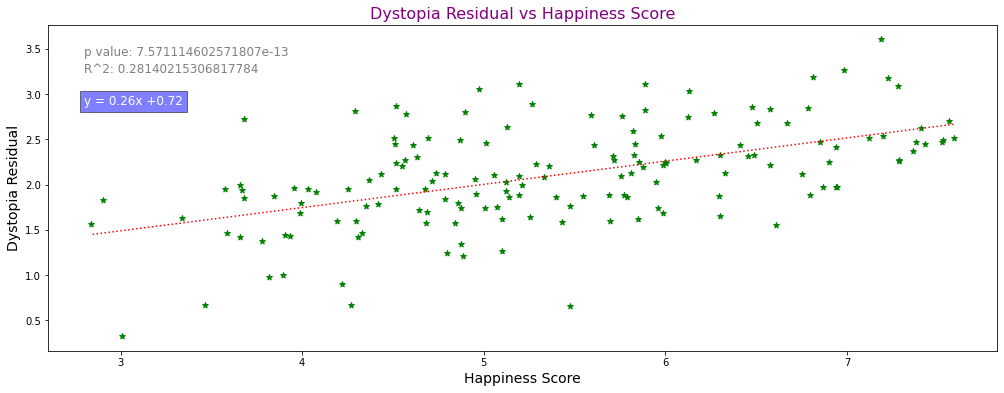

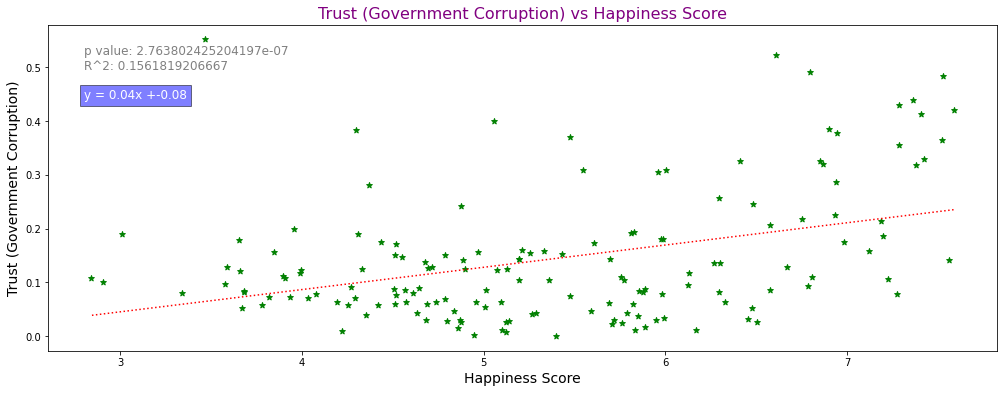

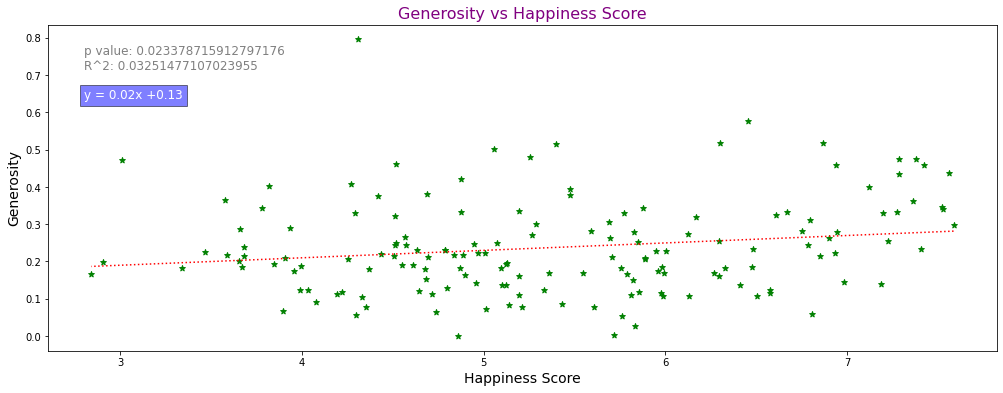

In [12]:
for item in ordered_list_factors_parameters:
  y_factor = item[0]
  y = item[1] 
  regression = item[2]
  create_graph(y_factor, y, regression)

#### Create a pie chart with the median  each of the 7 factors per region

In [13]:
factor_average_byregion = happiness_2015.groupby('Region')[list_factors].mean().transpose()
factor_average_byregion

Region,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
Dystopia Residual,2.265355,2.021400,1.681607,2.622577,1.980008,2.480935,1.783020,2.016769,2.019980,2.151185
Economy (GDP per Capita),1.291880,0.942438,1.151780,0.876815,1.066973,1.360400,0.789054,0.560486,0.380473,1.298596
Family,1.314450,1.053042,1.099427,1.104720,0.920490,1.284860,0.940468,0.645321,0.809085,1.247302
Freedom,0.645310,0.358269,0.462490,0.501740,0.361751,0.589505,0.557104,0.373337,0.365944,0.549926
Generosity,0.455315,0.152264,0.225885,0.217788,0.190375,0.429580,0.419261,0.341429,0.221137,0.302109
Health (Life Expectancy),0.919965,0.718774,0.877388,0.703870,0.705616,0.883710,0.677357,0.540830,0.282332,0.909148
Trust (Government Corruption),0.392795,0.086674,0.127695,0.117172,0.181702,0.244235,0.151276,0.102536,0.123878,0.231463


In [14]:
happiness_score_average_byregion = happiness_2015.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False)
happiness_score_average_byregion

Region
Australia and New Zealand          7.285000
North America                      7.273000
Western Europe                     6.689619
Latin America and Caribbean        6.144682
Eastern Asia                       5.626167
Middle East and Northern Africa    5.406900
Central and Eastern Europe         5.332931
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Name: Happiness Score, dtype: float64

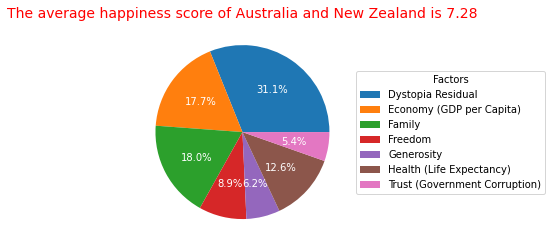

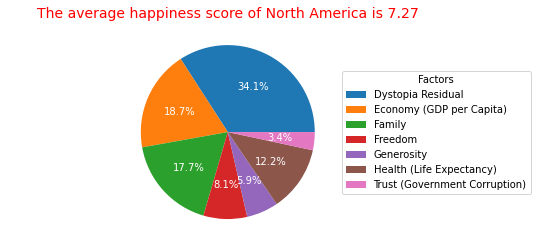

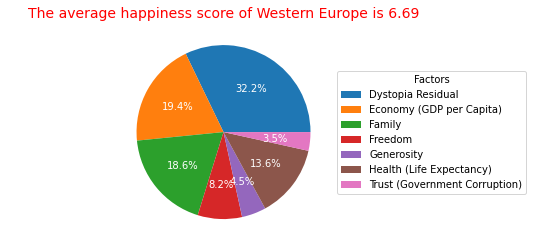

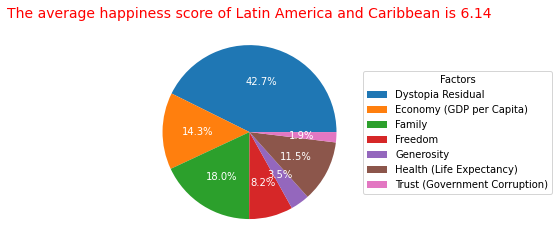

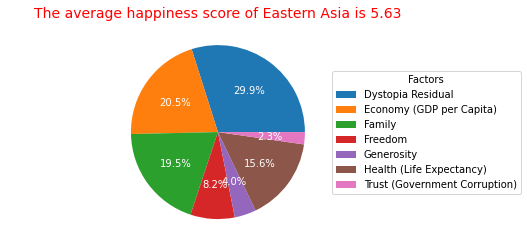

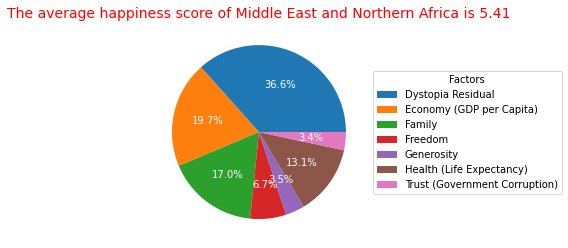

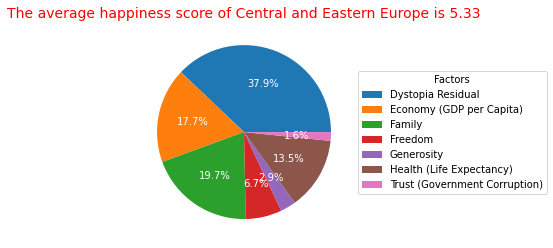

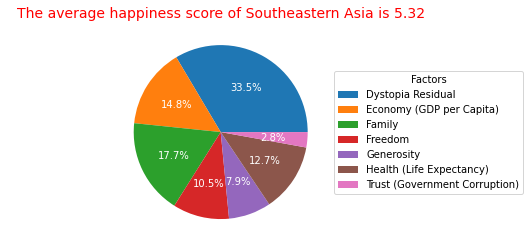

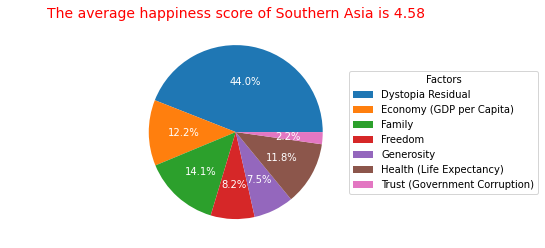

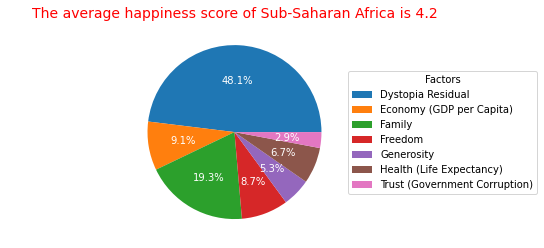

In [15]:
pie_labels = factor_average_byregion.index

for region in happiness_score_average_byregion.index:
  plt.figure()
  plt.pie(factor_average_byregion[region], labels=pie_labels, autopct='%1.1f%%', textprops={'color':"w"})
  plt.title('The average happiness score of '+ region + ' is ' + str(round(happiness_score_average_byregion.loc[region],2)),
            color='red', fontsize=14)
  plt.legend(pie_labels,
          title="Factors",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
  plt.show()

#### Plotting the 7 factors for the 2 countries with higher and lower happiness score in each region
* First, prepare the dataframes by filtering and sorting
* Then, create column graphs

In [16]:
len(happiness_2015.Region.unique())

10

In [17]:
list_of_prepared_dfs = []

for region in happiness_2015.Region.unique():
  new_df_happier = happiness_2015[happiness_2015.Region == region].sort_values('Happiness Score', ascending=False).iloc[:2]
  new_df_sadder = happiness_2015[happiness_2015.Region == region].sort_values('Happiness Score', ascending=False).iloc[-2:]
  new_df = new_df_happier.append(new_df_sadder).drop_duplicates()
  list_of_prepared_dfs.append((region, new_df))

In [18]:
list(list_of_prepared_dfs[0][1]['Country'])

['Switzerland', 'Iceland', 'Portugal', 'Greece']

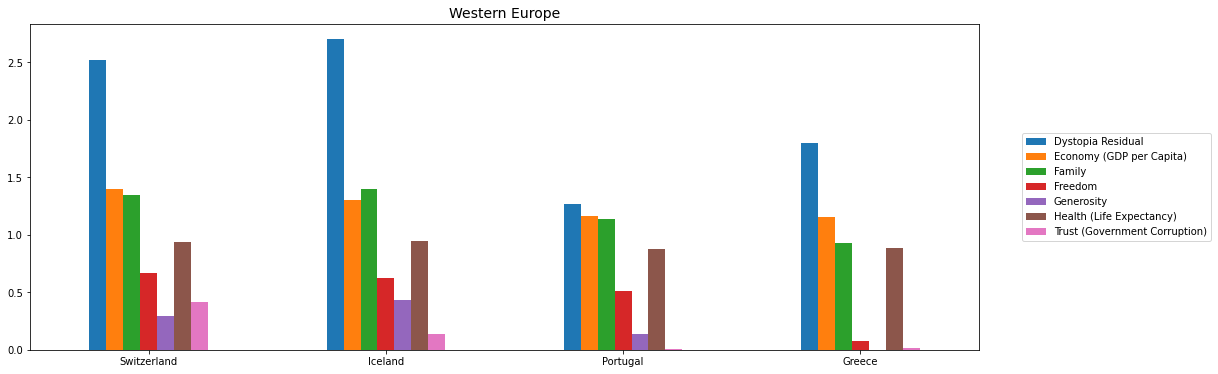

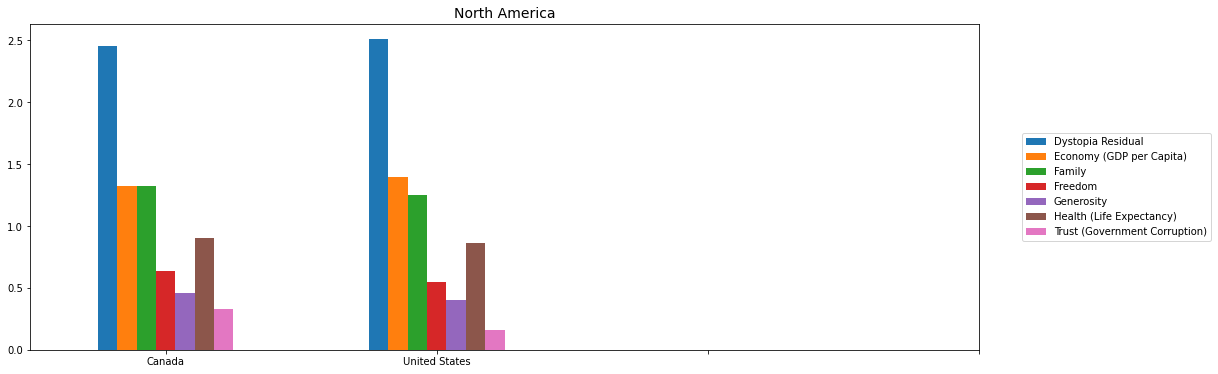

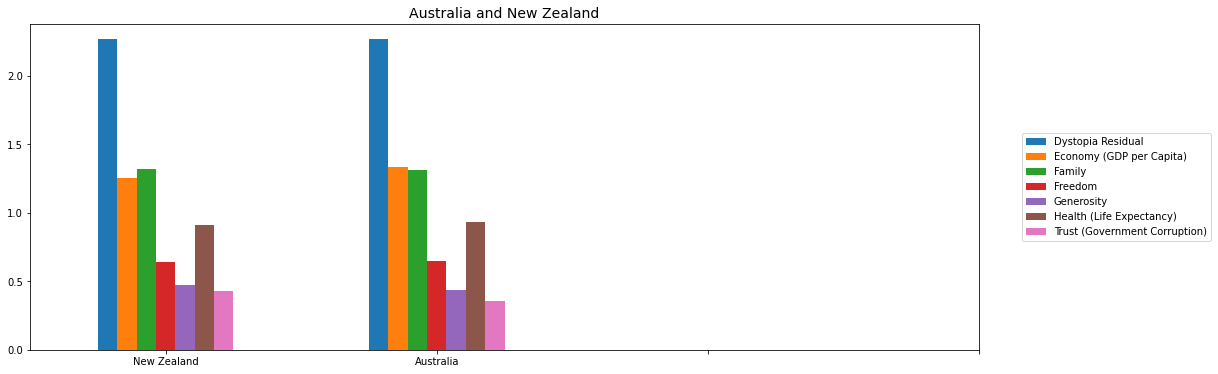

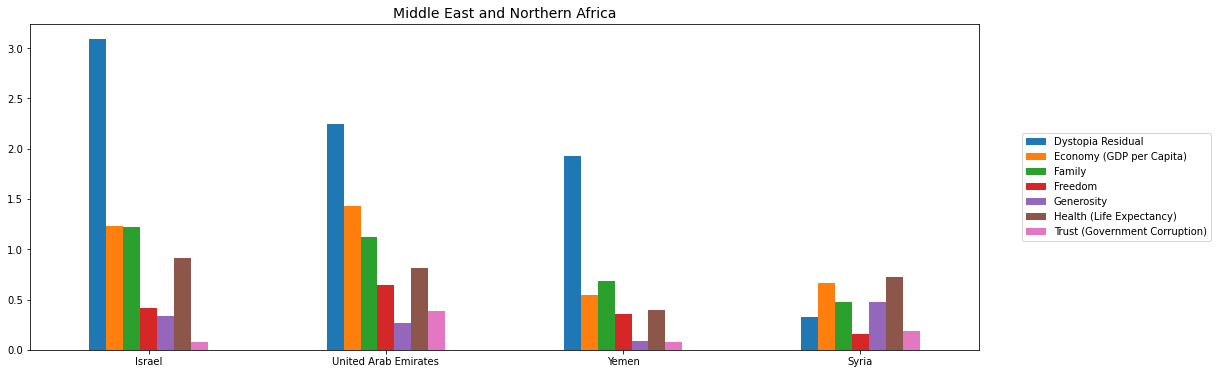

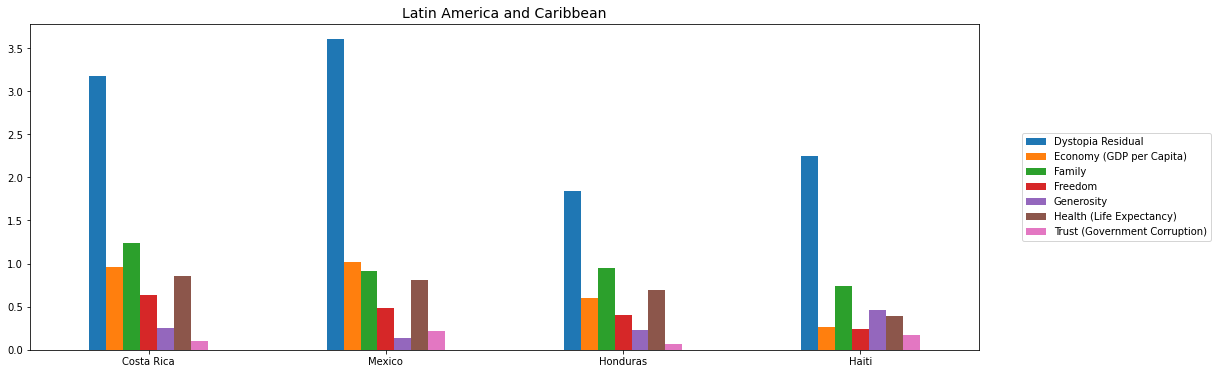

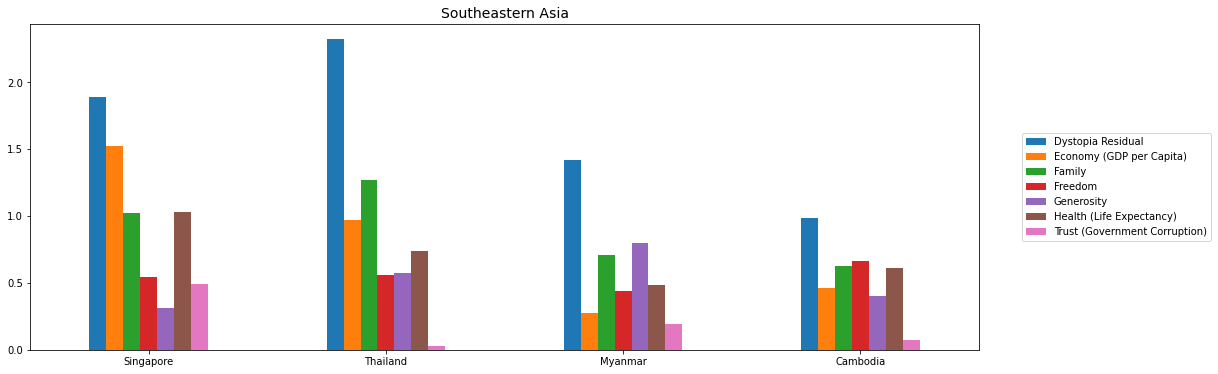

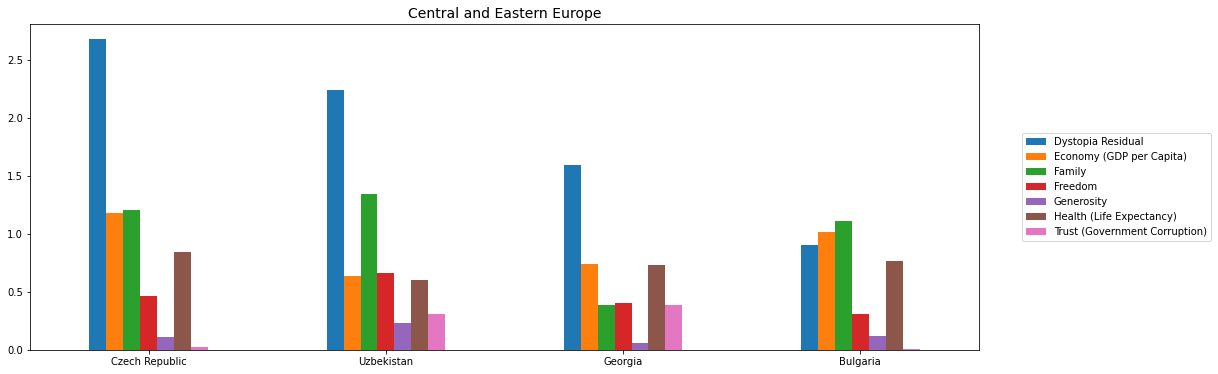

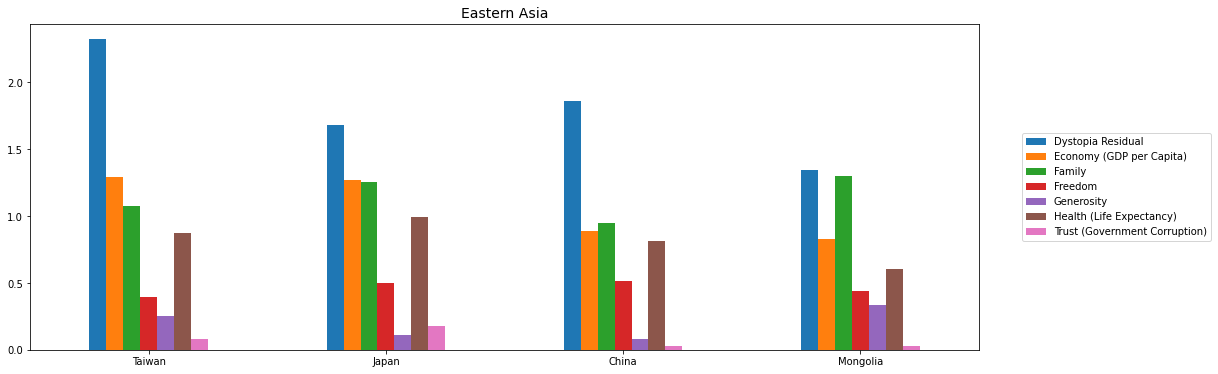

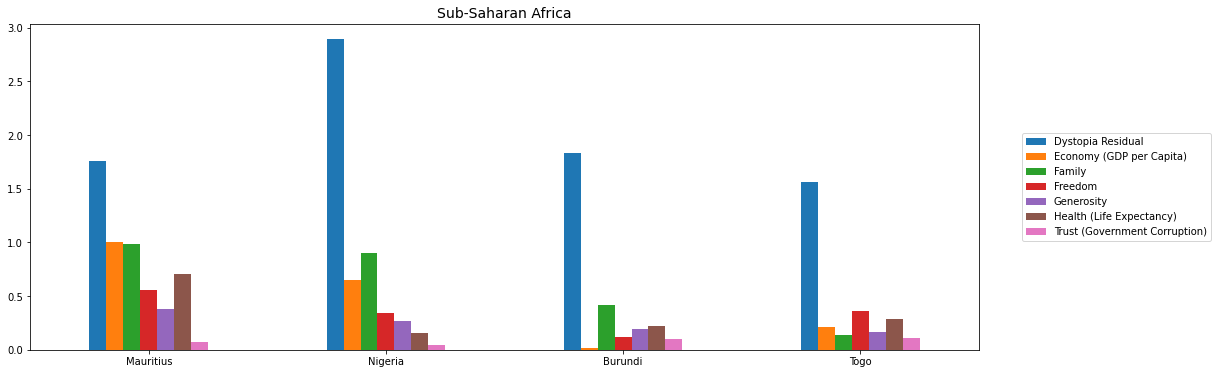

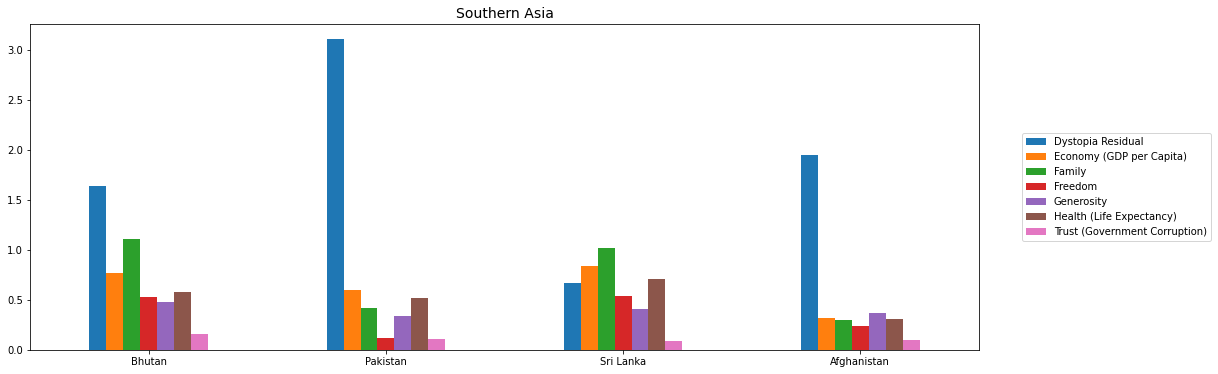

In [19]:
for i in range(10):
  list_of_prepared_dfs[i][1][list_factors].plot(kind='bar', figsize=(17,6))
  plt.title(list_of_prepared_dfs[i][0], fontsize=14)
  plt.legend(loc='center right', bbox_to_anchor=(0.75, 0, 0.5, 1))
  plt.xticks([0, 1, 2, 3],labels=list(list_of_prepared_dfs[i][1]['Country']), rotation=0)
  plt.show()

---
### Next steps

There are data sets for the years 2015 to 2019 available.  To access and try out other years, change 2015 to the required year in the URL in the first code cell.  Leave the rest exactly as it is.  

Other years may have different column headings and so there will be different data to play with.

### Wrangle the data to create a single dataframe with the years that allows analysis over time

In [20]:
happiness_2015['Year'] = 2015 
happiness_2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015


In [21]:
happiness_2016 = pd.read_excel('https://github.com/futureCodersSE/working-with-data/blob/main/Happiness-Data/2016.xlsx?raw=true')
happiness_2016['Year'] = 2016
happiness_2016.head(2)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016


In [22]:
happiness_2017 = pd.read_excel('https://github.com/futureCodersSE/working-with-data/blob/main/Happiness-Data/2017.xlsx?raw=true')
happiness_2017 = happiness_2017.rename(columns={'Happiness.Rank': 'Happiness Rank',
                               'Happiness.Score':'Happiness Score',
                               'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)', 
                               'Health..Life.Expectancy.': 'Health (Life Expectancy)',
                               'Trust..Government.Corruption.': 'Trust (Government Corruption)',
                               'Dystopia.Residual': 'Dystopia Residual'})
happiness_2017['Year'] = 2017
happiness_2017.head(2)

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017


In [23]:
happiness_2018 = pd.read_excel('https://github.com/futureCodersSE/working-with-data/blob/main/Happiness-Data/2018.xlsx?raw=true')
happiness_2018 = happiness_2018.rename(columns={'Overall rank': 'Happiness Rank',
                                                'Country or region': 'Country',
                                                'Score': 'Happiness Score',
                                                'GDP per capita.': 'Economy (GDP per Capita)',
                                                'Social support': 'Family',
                                                'Healthy life expectancy': 'Health (Life Expectancy)',
                                                'Freedom to make life choices': 'Freedom',
                                                'Perceptions of corruption': 'Trust (Government Corruption)'})
happiness_2018['Year'] = 2018
happiness_2018.head(2)

,Happiness Rank,Country,Happiness Score,GDP per capita,Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018


In [24]:
happiness_2019 = pd.read_excel('https://github.com/futureCodersSE/working-with-data/blob/main/Happiness-Data/2019.xlsx?raw=true')
happiness_2019 = happiness_2019.rename(columns={'Overall rank': 'Happiness Rank',
                                                'Country or region': 'Country',
                                                'Score': 'Happiness Score',
                                                'GDP per capita.': 'Economy (GDP per Capita)',
                                                'Social support': 'Family',
                                                'Healthy life expectancy': 'Health (Life Expectancy)',
                                                'Freedom to make life choices': 'Freedom',
                                                'Perceptions of corruption': 'Trust (Government Corruption)'})
happiness_2019['Year'] = 2019
happiness_2019.head(2)

,Happiness Rank,Country,Happiness Score,GDP per capita,Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019


In [25]:
happiness_2015_2019 = pd.concat([happiness_2015, happiness_2016, happiness_2017, happiness_2018, happiness_2019], join='inner', ignore_index=True)
happiness_2015_2019.head()

,Country,Happiness Rank,Happiness Score,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,1,7.587,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32261,0.90563,0.63297,0.32957,0.45811,2015


* Assuming the list of countries per region is the same as in 2015, create a column with the regions

In [26]:
happiness_2015_2019['Region'] = ''

# create map
regions_map = {}
for region in happiness_2015.Region.unique():
  country_list =[]
  for i in range(happiness_2015.shape[0]-1):
    if happiness_2015.loc[i,'Region'] == region:
      country_list.append(happiness_2015.loc[i,'Country'])
    else:
      pass
  regions_map[region] = country_list

regions_map['North America']

['Canada', 'United States']

In [27]:
def normalize_region(df):
  for region in regions_map.keys():
    if df['Country'] in regions_map[region]:
      return region

In [28]:
happiness_2015_2019.Region = happiness_2015_2019.apply(normalize_region, axis=1)
happiness_2015_2019.head()

,Country,Happiness Rank,Happiness Score,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Region
0,Switzerland,1,7.587,1.34951,0.94143,0.66557,0.41978,0.29678,2015,Western Europe
1,Iceland,2,7.561,1.40223,0.94784,0.62877,0.14145,0.43630,2015,Western Europe
2,Denmark,3,7.527,1.36058,0.87464,0.64938,0.48357,0.34139,2015,Western Europe
3,Norway,4,7.522,1.33095,0.88521,0.66973,0.36503,0.34699,2015,Western Europe
4,Canada,5,7.427,1.32261,0.90563,0.63297,0.32957,0.45811,2015,North America


In [29]:
display(happiness_2015_2019.Region.isna().sum(),
        happiness_2015_2019.shape)

30

(782, 10)

In [30]:
evolution_regions = happiness_2015_2019.groupby([ 'Region', 'Year']).mean()
evolution_regions

Happiness Rank  ...  Generosity
Region                          Year                  ...            
Australia and New Zealand       2015        9.500000  ...    0.455315
                                2016        8.500000  ...    0.484040
                                2017        9.000000  ...    0.488852
                                2018        9.000000  ...    0.363000
                                2019        9.500000  ...    0.331000
Central and Eastern Europe      2015       79.000000  ...    0.152264
                                2016       78.448276  ...    0.170898
                                2017       75.068966  ...    0.186116
                                2018       74.965517  ...    0.133000
                                2019       70.500000  ...    0.141214
Eastern Asia                    2015       64.500000  ...    0.225885
                                2016       67.166667  ...    0.223563
                                2017       71.250000  ...    0.173630
                                2018       65.500000  ...    0.155500
                                2019       64.833333  ...    0.172833
Latin America and Caribbean     2015       46.909091  ...    0.217788
                                2016       49.681818  ...    0.206519
                                2017       50.809524  ...    0.209300
                                2018       51.250000  ...    0.137850
                                2019       52.000000  ...    0.142600
Middle East and Northern Africa 2015       77.600000  ...    0.190375
                                2016       78.105263  ...    0.186749
                                2017       76.421053  ...    0.199172
                                2018       80.894737  ...    0.160947
                                2019       84.894737  ...    0.153474
North America                   2015       10.000000  ...    0.429580
                                2016        9.500000  ...    0.429555
                                2017       10.500000  ...    0.414059
                                2018       12.500000  ...    0.306000
                                2019       14.000000  ...    0.282500
Southeastern Asia               2015       81.222222  ...    0.419261
                                2016       80.000000  ...    0.446150
                                2017       73.750000  ...    0.449860
                                2018       81.888889  ...    0.311222
                                2019       85.111111  ...    0.301778
Southern Asia                   2015      113.142857  ...    0.341429
                                2016      111.714286  ...    0.343281
                                2017      109.857143  ...    0.341446
                                2018      111.714286  ...    0.243571
                                2019      115.857143  ...    0.234714
Sub-Saharan Africa              2015      127.128205  ...    0.222530
                                2016      131.606061  ...    0.221275
                                2017      128.171429  ...    0.231515
                                2018      126.857143  ...    0.174486
                                2019      124.342857  ...    0.187086
Western Europe                  2015       29.523810  ...    0.302109
                                2016       29.190476  ...    0.304715
                                2017       27.142857  ...    0.303497
                                2018       23.000000  ...    0.223850
                                2019       21.350000  ...    0.221050

[50 rows x 7 columns]

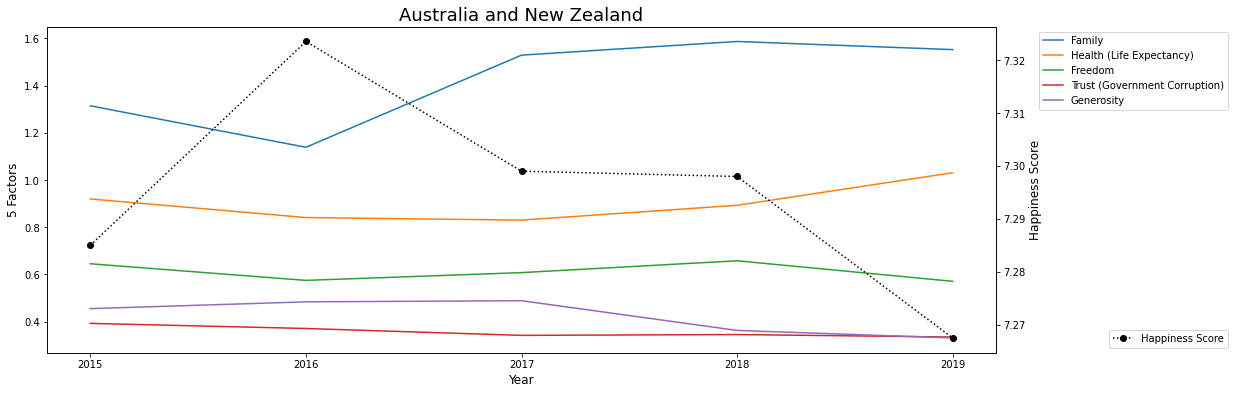

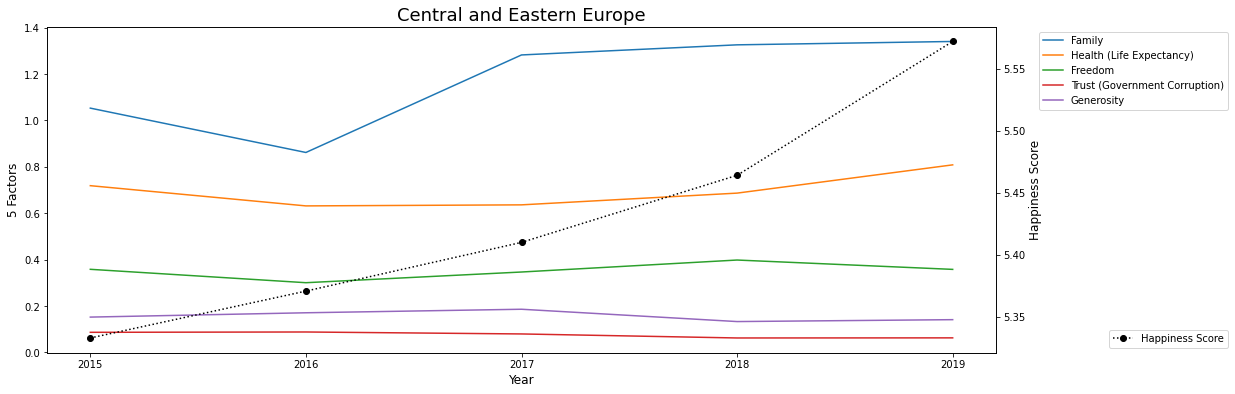

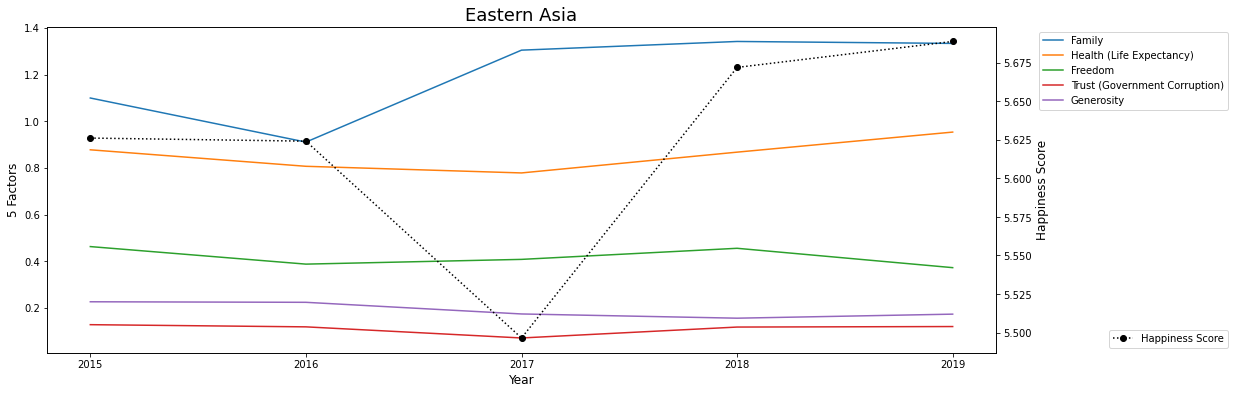

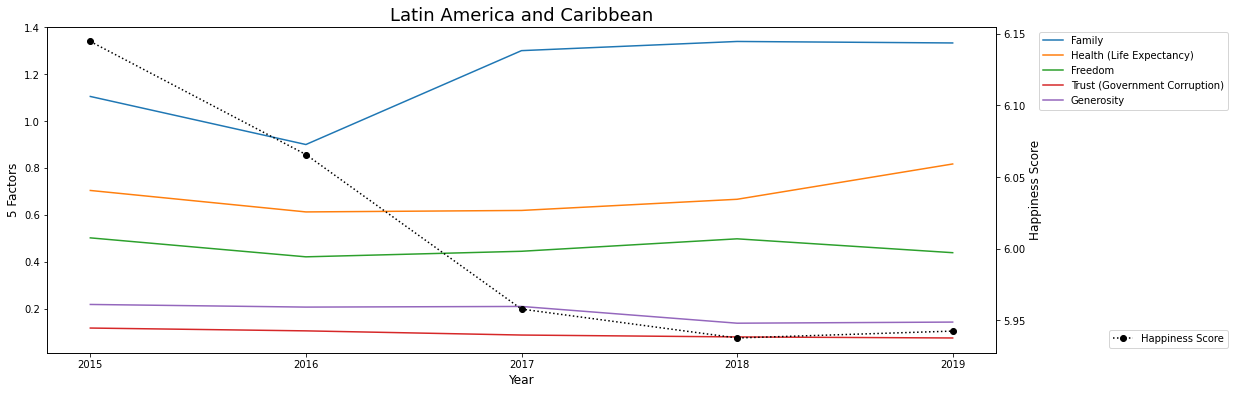

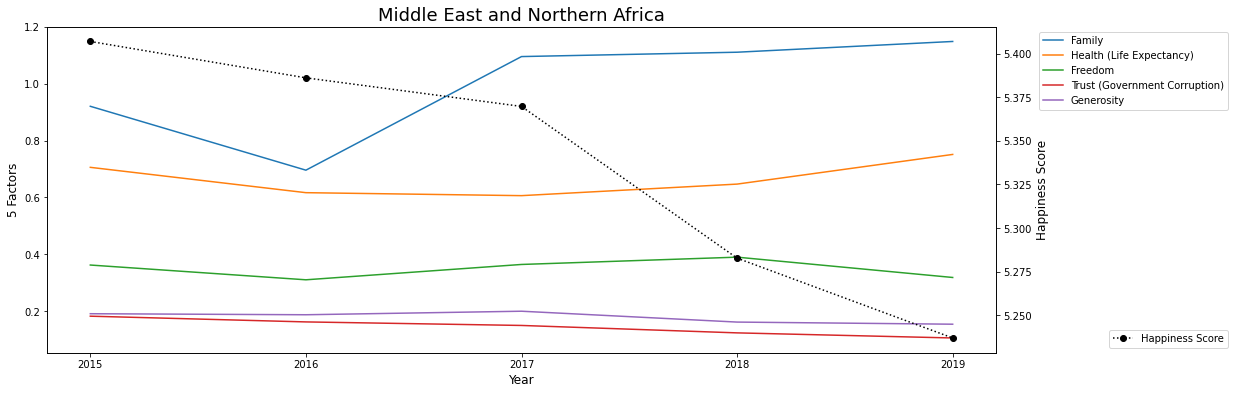

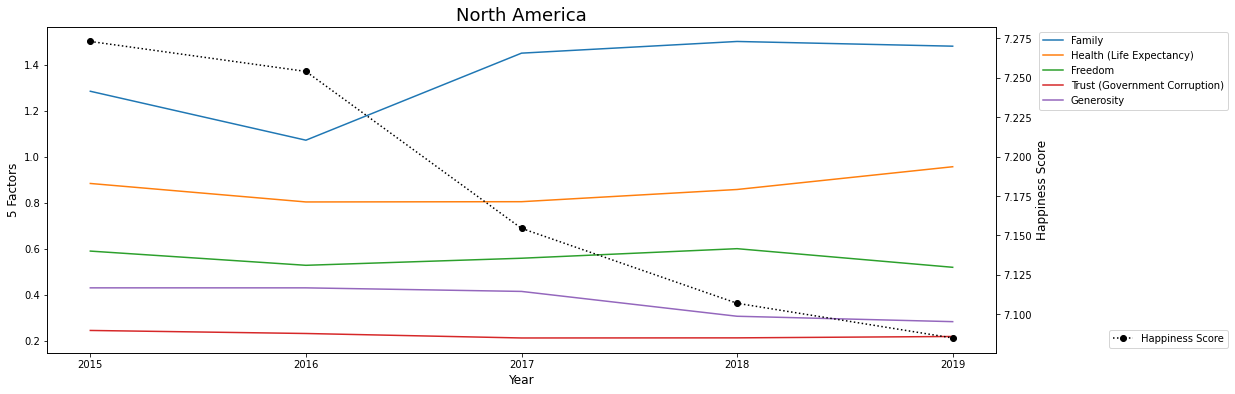

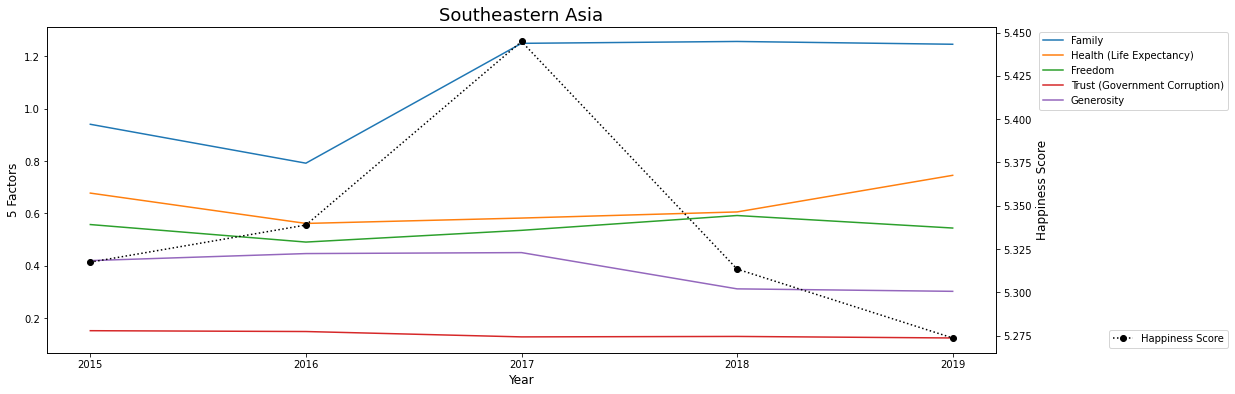

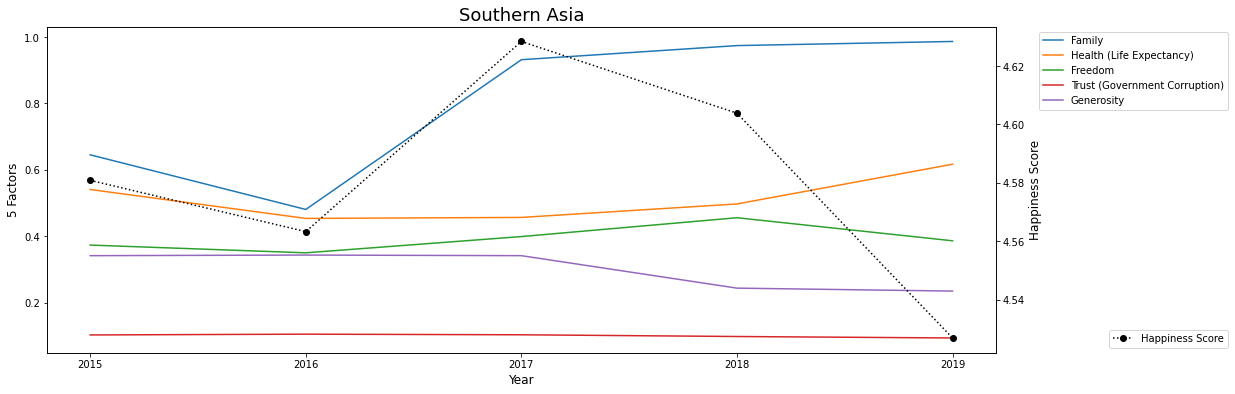

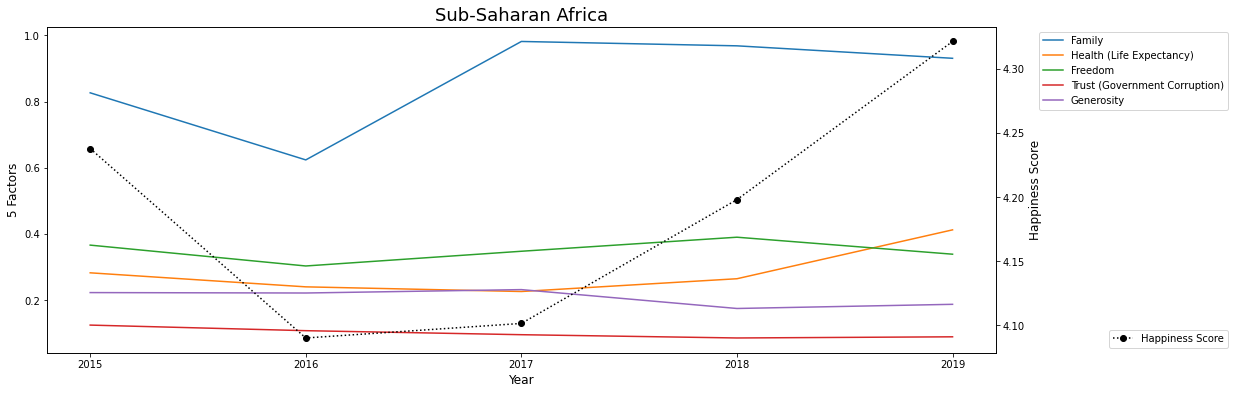

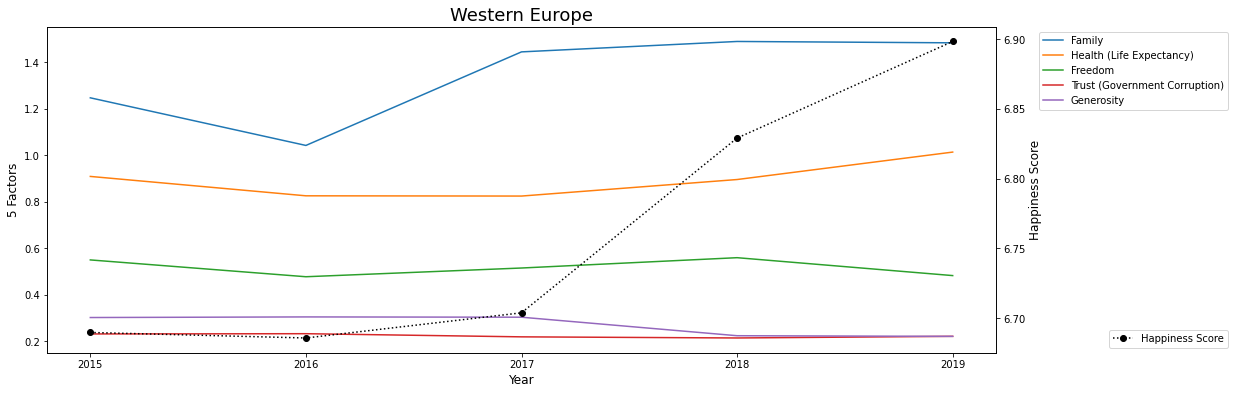

In [107]:
for region in evolution_regions.index.get_level_values(0).unique():
  temp_df = evolution_regions.loc[region]
  labels = list(temp_df.index)
  fig, ax = plt.subplots(figsize=(17,6))
  for factor in evolution_regions.columns:
    if factor in ['Family', 'Health (Life Expectancy)',	'Freedom', 'Trust (Government Corruption)','Generosity']:
      ax.plot(labels,temp_df[factor], label=factor)
    elif factor in ['Happiness Score']:
      ax2 = plt.twinx()
      ax2.plot(labels,temp_df[factor], label=factor, linestyle=':', marker='o', color='black')
  ax.legend(loc='upper right', bbox_to_anchor=(0.75, 0, 0.5, 1))
  ax2.legend(loc='lower right', bbox_to_anchor=(0.75, 0, 0.5, 1))
  ax.set_xlabel('Year', fontsize=12)
  ax.set_ylabel('5 Factors', fontsize=12)
  ax2.set_ylabel('Happiness Score', fontsize=12)
  plt.xticks(labels,labels)
  plt.title(region, fontsize=18)
  plt.show()